<b>Data visuvilisation of Annamalai university FEAT First year students</b>

In [15]:
#importing modules
import pandas as pd
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
tqdm.pandas()

<b>Fetch the data from the annamalai university portal</b>

In [ ]:
import requests

url = 'https://annamalaiuniversity.ac.in/adm/coun_admlist_be.php?admfor=910955a907e739b81ec8855763108a29'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
r = requests.get(url,headers=header)
dfs = pd.read_html(r.text,match="SPL")
#print(len(dfs))
df=dfs[0]
df["rounds"]="Nan"
display(df.head())
df.to_csv("AUstd.csv")

<b>Creating the rounds column to specify the admission round of the student</b>

In [31]:
rounds=["SPL","Round - I","Round - I (Upward)","Round - II","Round - II (Upward)","Round - III","Round - III (Govt 7.5%)","SPL - DAB (Govt 7.5%)","Round - I (Govt 7.5%)","Round - II (Govt 7.5%)","Round - III (Upward) - Govt 7.5%","Round - III (Upward)","Additional","Round - IV","Round - IV (Govt 7.5%)","Round - IV (Upward)","Supplementary","Supplementary (Govt 7.5%)","SCA to SC"]
for i,j in zip(range(1,len(dfs)),rounds):
    dfs[i]["Rounds"]=j

<b>Clean the data </b>

In [32]:
final=[dfs[i] for i in range(1,len(dfs))]
final=pd.concat(final)
#display(final)
final=final[final[2]!="Name"]
final.columns=["SI.NO","Appl NO","Name","Branch","Dob","Community","Payment","Rounds"]
final.drop(["Payment"],axis=1,inplace=True)
final["SI.NO"]=[i for i in range(1,final.shape[0]+1)]
final.set_index("SI.NO",inplace=True)
display(final.head())

,Appl NO,Name,Branch,Dob,Community,Rounds
SI.NO,,,,,,
1,201782,MOHAN K,Computer Science and Engineering (Artificial I...,17/08/2004,BC,SPL
2,404123,DISHYA S,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I
3,337886,KALAI SELVAN M,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I
4,400218,YOGESWARI MEYYAMMAI M,COMPUTER SCIENCE AND ENGINEERING,NaN,OC,Round - I
5,318082,Niranjana. T,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I


<b>Display the students details based on admission rounds using Bar diagram</b>

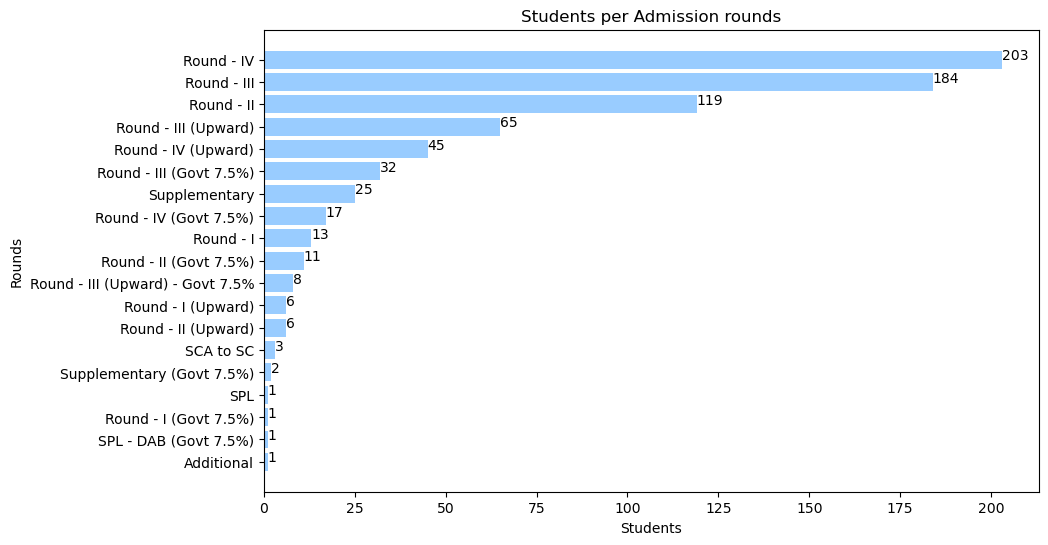

In [34]:
count=final.groupby(["Rounds"]).size().reset_index(name="count")
count.sort_values("count",inplace=True)
plt.figure(figsize = (10,6))
x=count["Rounds"]
y=count["count"]
plt.barh(x,y,color="#99ccff")
plt.title("Students per Admission rounds")
plt.xlabel("Students")
plt.ylabel("Rounds")
for index, value in enumerate(y):
    plt.text(value, index,str(value))
plt.show()

<b>Display the students details based on admission rounds using pie diagram</b>

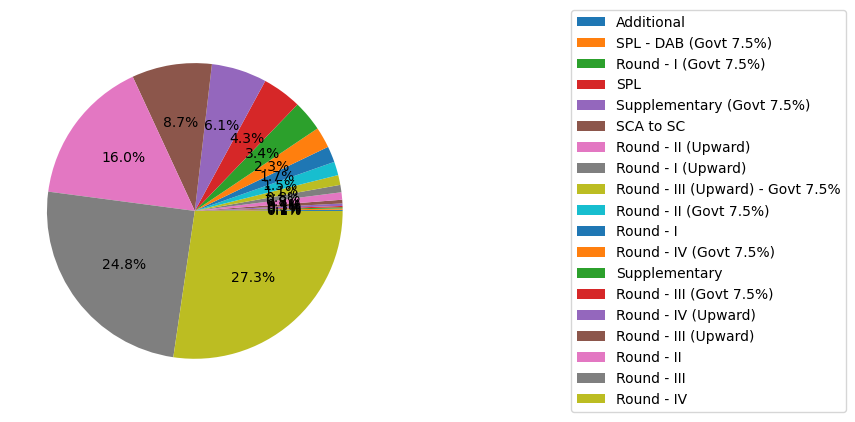

In [37]:
#display(count)
plt.pie(count["count"],autopct = '%1.1f%%')
plt.legend(labels=count["Rounds"],loc="center left",bbox_to_anchor =(1.5, 0,0.5, 1))
plt.show()

In [38]:
final["Branch"]=final["Branch"].str.upper()
final.loc[final["Branch"].str.contains("ARTIFICIAL"),"Branch"]="COMPUTER SCIENCE AND ENGINEERING (AI AND ML)"

<b>Display the details of students based on their departments</b>

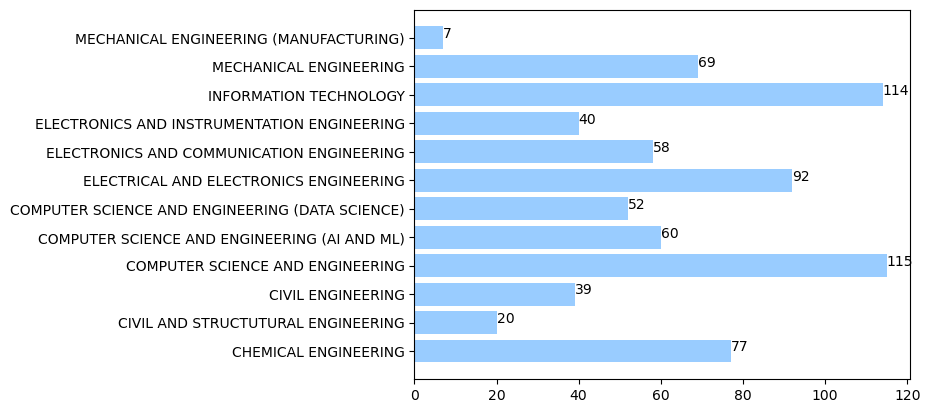

In [39]:
#student strength dep wise
df_dep=final.groupby(["Branch"]).size().reset_index(name="dep")
x=df_dep["Branch"]
y=df_dep["dep"]
plt.barh(x,y,color="#99ccff")
for index, value in enumerate(y):
    plt.text(value, index,str(value))
plt.show()

<b>display the details of students using pie diagram</b>

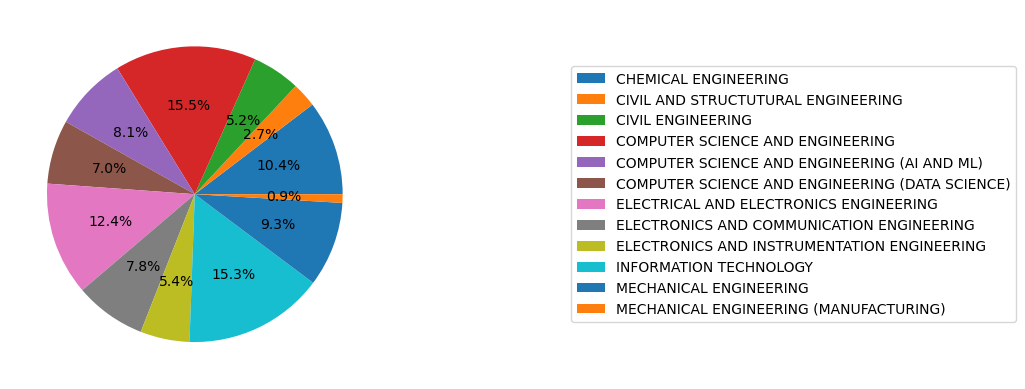

In [40]:
plt.pie(df_dep["dep"],autopct="%1.1f%%")
plt.legend(labels=df_dep["Branch"],loc="center left",bbox_to_anchor =(1.5, 0,0.5, 1))
plt.show()

In [24]:
def find_gender(name):
    name=name.replace("."," ")
    name=name.split()
    if len(name[0])<=2:
        name=name[1]
    else:
        name=name[0]
    try:
        url = "https://genderify3.p.rapidapi.com/genderify"
        querystring = {"text":name}        
        headers = {
            "X-RapidAPI-Key": "8d91f844edmsha62f44d81da11bcp14b4cbjsnc3805772840c",
            "X-RapidAPI-Host": "genderify3.p.rapidapi.com"}
        response = eval(requests.request("GET", url, headers=headers, params=querystring).text)
        return response["gender"]
    except:
        return "NULL"
        

In [25]:

# final["gender"]=final["Name"].progress_apply(find_gender)
# final.to_csv("gender.csv")
print("Creating the gender column using API")

Creating the gender column using API


In [26]:
b=final[final["Branch"]=="MECHANICAL ENGINEERING"]
b["gender"]="male"
final.update(b)


C:\Users\Raja Bala\AppData\Local\Temp\ipykernel_24092\1354364494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["gender"]="male"


In [41]:
final=pd.read_csv("gender.csv")
final.head()

,Unnamed: 0,SI.NO,Appl NO,Name,Branch,Dob,Community,Rounds,gender
0,0,1.0,201782.0,MOHAN K,COMPUTER SCIENCE AND ENGINEERING (AI AND ML),17/08/2004,BC,SPL,male
1,1,2.0,404123.0,DISHYA S,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,female
2,2,3.0,337886.0,KALAI SELVAN M,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,male
3,3,4.0,400218.0,YOGESWARI MEYYAMMAI M,COMPUTER SCIENCE AND ENGINEERING,NaN,OC,Round - I,female
4,4,5.0,318082.0,Niranjana. T,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,female


,gender,count
0,female,336
1,male,407


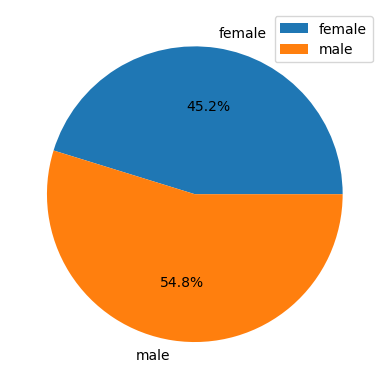

In [42]:
df_gender=final.groupby(["gender"]).size().reset_index(name="count")
display(df_gender)
plt.pie(df_gender["count"],labels=df_gender["gender"],autopct="%1.1f%%")
plt.legend(df_gender["gender"])
plt.show()

,Unnamed: 0,SI.NO,Appl NO,Name,Branch,Dob,Community,Rounds,gender
0,0,1.0,201782.0,MOHAN K,COMPUTER SCIENCE AND ENGINEERING (AI AND ML),17/08/2004,BC,SPL,male
1,1,2.0,404123.0,DISHYA S,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,female
2,2,3.0,337886.0,KALAI SELVAN M,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,male
3,3,4.0,400218.0,YOGESWARI MEYYAMMAI M,COMPUTER SCIENCE AND ENGINEERING,NaN,OC,Round - I,female
4,4,5.0,318082.0,Niranjana. T,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,female


<AxesSubplot:xlabel='Branch'>

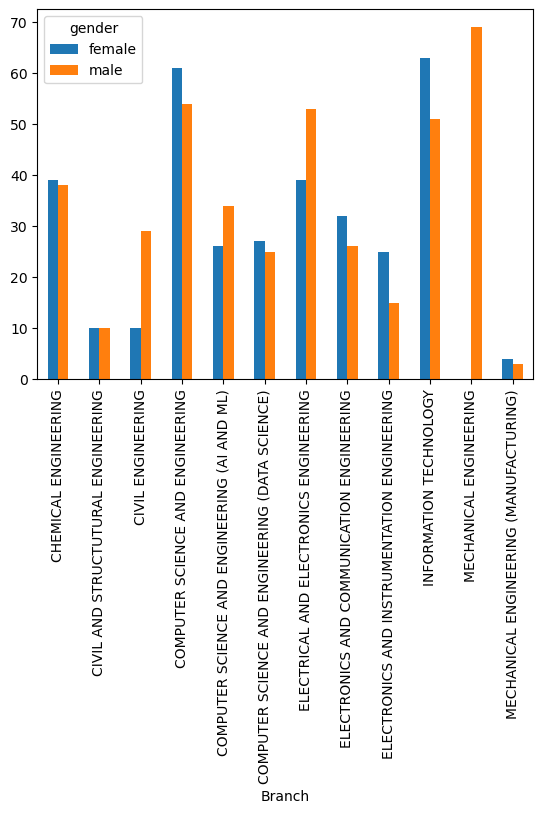

In [43]:
display(final.head())
final.groupby("gender").Branch.value_counts().unstack(0).plot.bar()